In [1]:
import os
os.environ["BRASA_DATA_PATH"] = "D:\\brasa"

import sys
sys.path.append('..')

from datetime import datetime

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.dataset as ds
import pyarrow.compute as pc

import brasa

In [2]:
man = brasa.CacheManager()

In [3]:
df_index = brasa.get_dataset("b3-indexes-marketdata")\
    .filter(pc.field("symbol") == "IBXX")\
    .filter(pc.field("refdate") >= datetime(2021, 7, 1))\
    .to_table(columns=["refdate", "symbol", "log_return"])\
    .to_pandas()\
    .pivot(columns="symbol", index="refdate", values="log_return")

In [4]:
symbols = ["PETR4", "VALE3", "JBSS3", "PSSA3", "B3SA3", "MGLU3"]
df_stocks = brasa.get_dataset("b3-equities-marketdata")\
    .filter(pc.field("symbol").isin(symbols))\
    .filter(pc.field("refdate") >= datetime(2021, 7, 1))\
    .to_table(columns=["refdate", "symbol", "log_return"])\
    .to_pandas()\
    .pivot(columns="symbol", index="refdate", values="log_return")

In [10]:
exog = sm.add_constant(df_index["IBXX"])
endog = df_stocks["PETR4"]
res = RollingOLS(endog, exog, window=63).fit()

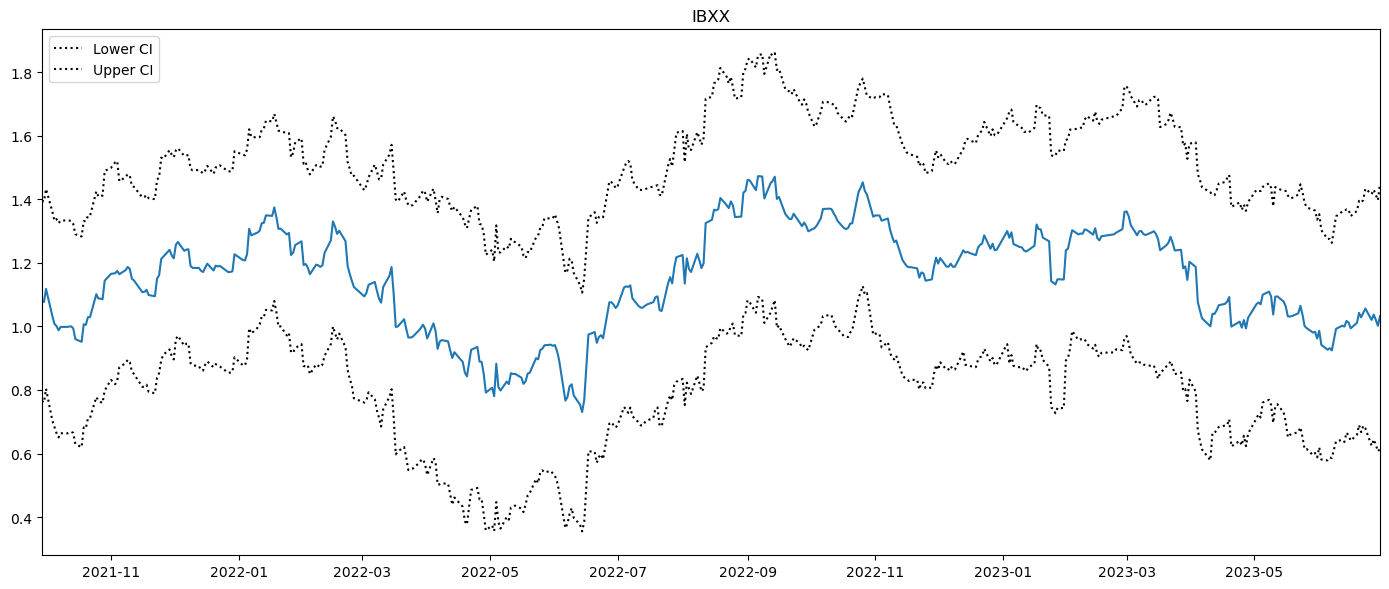

In [11]:
fig = res.plot_recursive_coefficient(variables=["IBXX"], figsize=(14, 6))

In [13]:
endog = df_stocks["PETR4"]
exog = sm.add_constant(df_index["IBXX"])
res = sm.OLS(endog, exog).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PETR4   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     309.6
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           3.37e-54
Time:                        07:12:40   Log-Likelihood:                 1266.8
No. Observations:                 498   AIC:                            -2530.
Df Residuals:                     496   BIC:                            -2521.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.001      2.803      0.005       0.001       0.004
IBXX           1.1584      0.066     17.594      0.000       1.029       1.288
==============================================================================
Omnibus:                       39.626   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.463
Skew:                          -0.295   Prob(JB):                     1.27e-28
Kurtosis:                       5.417   Cond. No.                         77.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df_stocks_month = df_stocks.resample("M").sum()
df_index_month = df_index.resample("M").sum()
endog = df_stocks_month["PETR4"]
exog = sm.add_constant(df_index_month["IBXX"])
res = sm.OLS(endog, exog).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PETR4   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     15.66
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           0.000670
Time:                        07:12:51   Log-Likelihood:                 30.685
No. Observations:                  24   AIC:                            -57.37
Df Residuals:                      22   BIC:                            -55.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0496      0.014      3.456      0.002       0.020       0.079
IBXX           1.0284      0.260      3.957      0.001       0.489       1.567
==============================================================================
Omnibus:                        2.212   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.859
Skew:                          -0.645   Prob(JB):                        0.395
Kurtosis:                       2.560   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""